In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing Lirbraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the dataset
nba_df=pd.read_csv('/content/drive/MyDrive/NBA_data')

In [ ]:
#printing first five rows
nba_df.head()

,Player,Position,Age,Games,Minutes Played,True Shooting(%),Threepoint Attempt rate,Free throw attempt rate,Player Efficiency Rating
0,Precious Achiuwa,PF,21,28,408.0,0.599,0.000,0.541,15.1
1,Jaylen Adams,PG,24,6,17.0,0.125,0.250,0.000,-6.9
2,Steven Adams,C,27,27,760.0,0.592,NaN,0.397,15.9
3,Bam Adebayo,C,23,26,873.0,0.641,0.015,0.469,22.7
4,LaMarcus Aldridge,C,35,18,480.0,0.542,0.298,0.093,15.2


In [ ]:
#checking the null values in the dataset
nba_df.isnull().sum()

Player                      0
Position                    0
Age                         0
Games                       0
Minutes Played              2
True Shooting(%)            3
Threepoint Attempt rate     2
Free throw attempt rate     2
Player Efficiency Rating    0
dtype: int64

In [ ]:
#Total columns present in it
nba_df.columns

Index(['Player', 'Position', 'Age', 'Games', 'Minutes Played',
       'True Shooting(%)', 'Threepoint Attempt rate',
       'Free throw attempt rate', 'Player Efficiency Rating'],
      dtype='object')

In [ ]:
#Replace the values with mean values
print(nba_df.fillna(nba_df.mean()).isnull().sum())

Player                      0
Position                    0
Age                         0
Games                       0
Minutes Played              0
True Shooting(%)            0
Threepoint Attempt rate     0
Free throw attempt rate     0
Player Efficiency Rating    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
#Replace tha 'NaN' values with '0'
nba_df['Threepoint Attempt rate']=nba_df['Threepoint Attempt rate'].fillna(0)
nba_df.head()

,Player,Position,Age,Games,Minutes Played,True Shooting(%),Threepoint Attempt rate,Free throw attempt rate,Player Efficiency Rating
0,Precious Achiuwa,PF,21,28,408.0,0.599,0.000,0.541,15.1
1,Jaylen Adams,PG,24,6,17.0,0.125,0.250,0.000,-6.9
2,Steven Adams,C,27,27,760.0,0.592,0.000,0.397,15.9
3,Bam Adebayo,C,23,26,873.0,0.641,0.015,0.469,22.7
4,LaMarcus Aldridge,C,35,18,480.0,0.542,0.298,0.093,15.2


In [ ]:
#Displaying the statistical Measures
nba_df.describe()

,Age,Games,Minutes Played,True Shooting(%),Threepoint Attempt rate,Free throw attempt rate,Player Efficiency Rating
count,497.000000,497.000000,495.000000,494.000000,497.000000,495.000000,497.000000
mean,25.623742,18.456740,416.492929,0.538939,0.404726,0.274804,12.646278
std,4.054229,8.311394,297.543620,0.130360,0.235149,0.270650,7.404316
min,19.000000,1.000000,2.000000,0.000000,0.000000,0.000000,-40.900000
25%,22.000000,12.000000,127.000000,0.500000,0.253000,0.142000,9.300000
50%,25.000000,20.000000,417.000000,0.556000,0.418000,0.227000,12.600000
75%,28.000000,26.000000,665.500000,0.607000,0.563000,0.318000,16.700000
max,37.000000,30.000000,1101.000000,1.500000,1.000000,2.667000,38.700000


In [ ]:
#Dimensions of Dataset and info of dataset
print(nba_df.info())
nba_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player                    497 non-null    object 
 1   Position                  497 non-null    object 
 2   Age                       497 non-null    int64  
 3   Games                     497 non-null    int64  
 4   Minutes Played            495 non-null    float64
 5   True Shooting(%)          494 non-null    float64
 6   Threepoint Attempt rate   497 non-null    float64
 7   Free throw attempt rate   495 non-null    float64
 8   Player Efficiency Rating  497 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 35.1+ KB
None


(497, 9)

In [ ]:
#No of players of Each Position
nba_df['Position'].value_counts()

SG       122
PF       102
PG        92
C         89
SF        84
G          4
F          2
SF-PF      1
F-C        1
Name: Position, dtype: int64

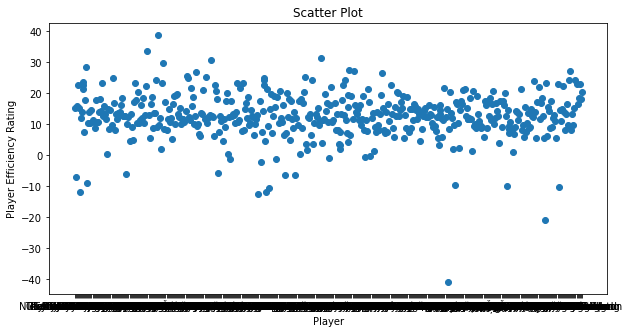

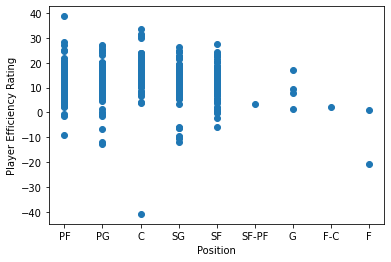

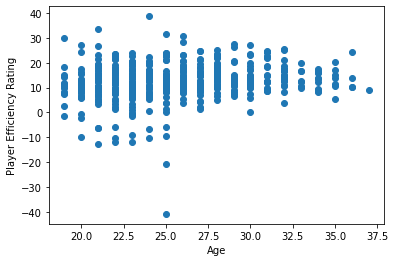

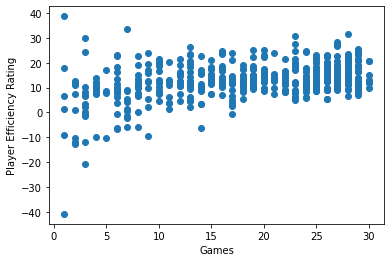

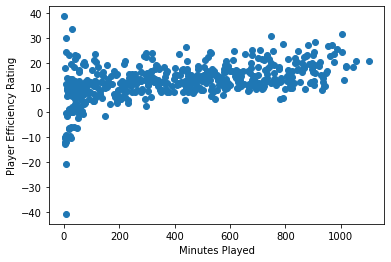

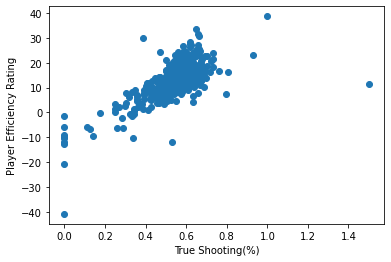

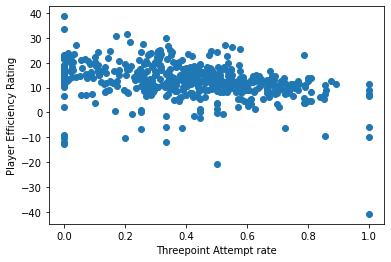

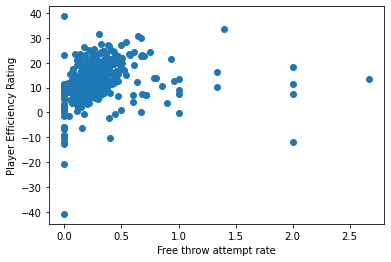

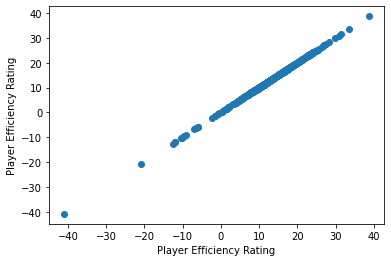

In [ ]:
#Data Visualization

plt.figure(figsize=(10,5))
plt.title('Scatter Plot')
for i in nba_df.columns:
  plt.scatter(x=nba_df[i],y=nba_df['Player Efficiency Rating'])
  plt.xlabel(i)
  plt.ylabel('Player Efficiency Rating')
  plt.show()

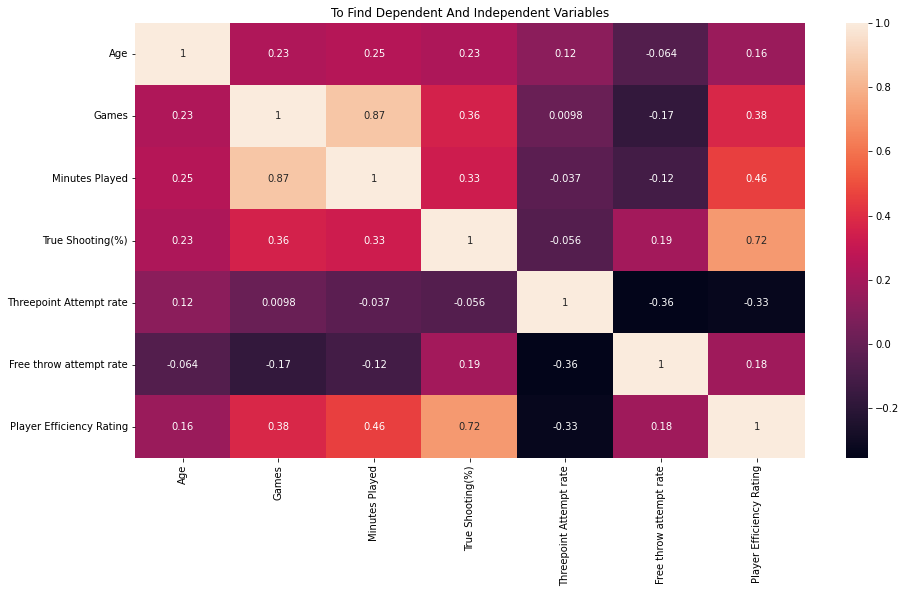

In [ ]:
#Find the correlation among the columns to find the dependent and independent columns
plt.figure(figsize=(15,8))
plt.title('To Find Dependent And Independent Variables')
sns.heatmap(nba_df.corr(),annot=True)
plt.show()

In [ ]:
# From the heatmap we identify the independent terms are Age, Free Throw Attempt
#Player Efficiency and True Shooting are strongly Correlated

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


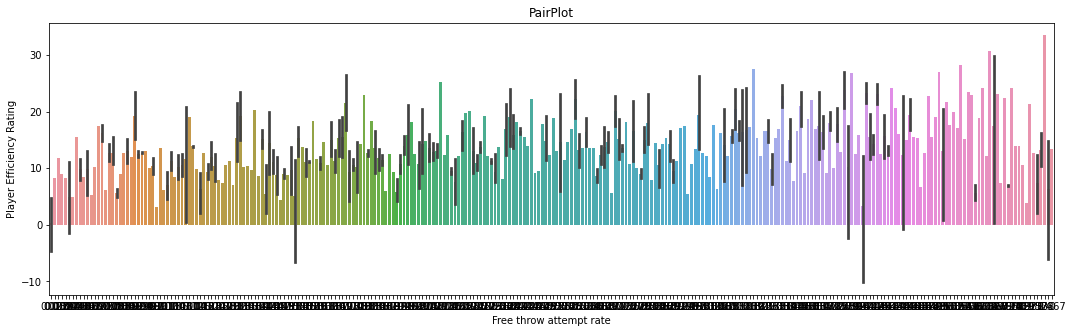

In [ ]:
#BarPlot
plt.figure(figsize=(18,5))
plt.title('BarPlot')
sns.barplot(nba_df['Free throw attempt rate'],nba_df['Player Efficiency Rating'])
plt.show()

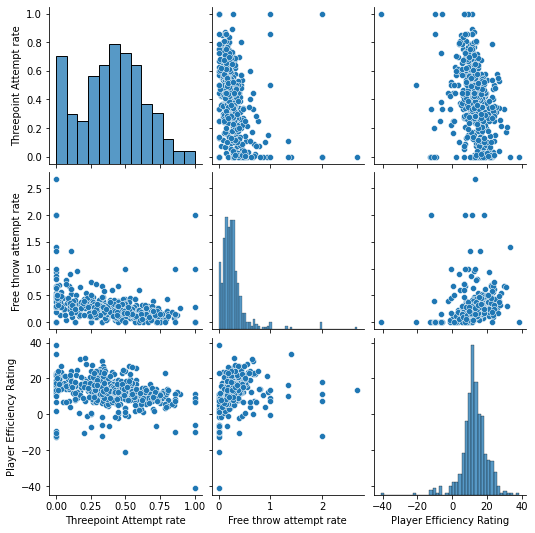

In [ ]:
#PairPlot
sns.pairplot(nba_df[['Threepoint Attempt rate','Free throw attempt rate','Player Efficiency Rating']])

In [ ]:
y=nba_df.iloc[:,4]
y

0      408.0
1       17.0
2      760.0
3      873.0
4      480.0
       ...  
492    823.0
493    592.0
494    901.0
495    361.0
496    586.0
Name: Minutes Played, Length: 497, dtype: float64

In [ ]:
type(y)

pandas.core.series.Series